## Group 31 Project:

## A Statistical Investigation Into Accountability and Racial-biases in US Police Shootings

### 1. Introduction

Racial discrimination is a systemic issue frequently highlighted in the disparities of the treatment of different racial groups in the justice system.  Data on US police shootings is critical to gain greater insight into the effect of racial biases on the probability of being shot by police officers. Recent police shooting data released from several sources show that black Americans are killed at a higher rate than white Americans(Washington Post, 2020)(Edward et al, 2019). Previous studies (Nix, J., Campbell, B. A., Byers, E. H. & Alpert, G. P. Criminol. Public Policy 16, 309–340 (2017)) have revealed that police shooting victims from a black racial background have approximately double the probability of being unarmed when killed compared to white shooting victims. The increased risk of black Americans being shot and the decreased risk of them being able to harm the officer in question supports the existence of police racial bias towards those from a black background.

Our analysis uses data(Nazir, 2020) on US police shootings(2015-2020) to gain greater insight into the effect of police surveillance on racial bias. The raw data was retrieved from the website Kaggle and tidied by Ahsen Nazir. The population of interest consists of all black American victims of US police shootings and we are using a randomly selected sample of 400 to conduct this investigation. Our response variable and point estimate is the proportion of black American police shooting victims in the US. We chose proportion as a location parameter and standard deviation as a scale parameter.  Our explanatory variable is the presence of activated body cameras. The variables and parameters allow us to determine the effect of racial surveillance on the proportion of victims of a certain race and quantify the variability of our results.

We are conducting a hypothesis test to examine whether the proportion of black victims killed in US police shootings differs between the presence and absence of body cameras. Our null hypothesis is that the proportion of black US victims shot by police with body cameras is the same as that without body cameras; and the alternate hypothesis is that the two proportions are different.

Through our analysis, we hope to gain a clearer understanding of the impact of police surveillance on their racial bias.  If we reject our null hypothesis like we expect, we will have evidence to suggest a re-evaluation of the accountability of police officers hopefully resulting in changes in the regulatory guidelines and policies for American police departments.  For example, departments could introduce mandatory body cameras and mics on every police officer during working hours and hire trustworthy individuals to review the footage and report any misconduct or perceived biases to relevant authorities.

In this project, we define $p1$ to be the proportion of black victims in US police shootings with police body cameras and $p2$ to be the proportion of black victims in US police shootings without police body cameras. <br>

Below are the null and alternative hypotheses presented symbolically in Figure 1.0.
<br>
$H_0: p_1 = p_2$ or $H_0: p_1 - p_2 = 0$ <br>
$H_A: p_1 \neq p_2$ or $H_A: p_1 - p_2 \neq 0$ <br>

**Figure 1.0**, Null Hypothesis and Alternate Hypothesis.

### Setting significance level $\alpha$
 
It’s important to set the significance level before starting the testing using the data. This project conventionally sets the significance level $\alpha = 5\%$.

### 2. Exploring the data

First, we loaded all the needed packages and then read in our dataset directly from the Github repo:

In [1]:
# Run this cell to import packages 
list.of.packages <- c("tidyverse", "infer", "gridExtra","janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(tidyverse)
library(infer)
library(gridExtra)
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# Read the original dataset into R and look at the first 6 rows
shootings <- read.csv("https://raw.githubusercontent.com/TeevintPrak/STAT-201-Group-Project/main/shootings.csv")

Tidying dataset by removing any missing values from the dataset and changing any variables of type `<chr>` to type `<factor>`. 

In [3]:
shootings <- shootings |>
    na.omit() |> 
    mutate_if(is.character, as.factor)
# we check if there's any NA values remained
sum(is.na(shootings))
head(shootings)

[1] 0

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns


**Figure 2.0**, the full tidied data set. 

Examining the original levels of variables `race` and `body_camera`

In [4]:
levels(shootings$race)
levels(shootings$body_camera)

[1] "Asian"    "Black"    "Hispanic" "Native"   "Other"    "White"

[1] "False" "True"

Since the emphasis of this study is on black victims, we have changed the levels of 'race' as "Black" and "NonBlack," as seen in Figure 2.0.

In [5]:
levels(shootings$race) <- 
  list(Black = "Black",
       NonBlack = levels(shootings$race)[!levels(shootings$race) %in% "Black"])
levels(shootings$race)

counts <- shootings %>% tabyl(race, body_camera)
counts

[1] "Black"    "NonBlack"

race,False,True
<fct>,<dbl>,<dbl>
Black,1094,204
NonBlack,3223,374


**Figure 2.1**, a table listing the counts of with and without body camera data points for "Black" and "NonBlack".

And now we proceed to visualize the racial distribution of all shooting victims in presence of body cameras as in Figure 2.1. 

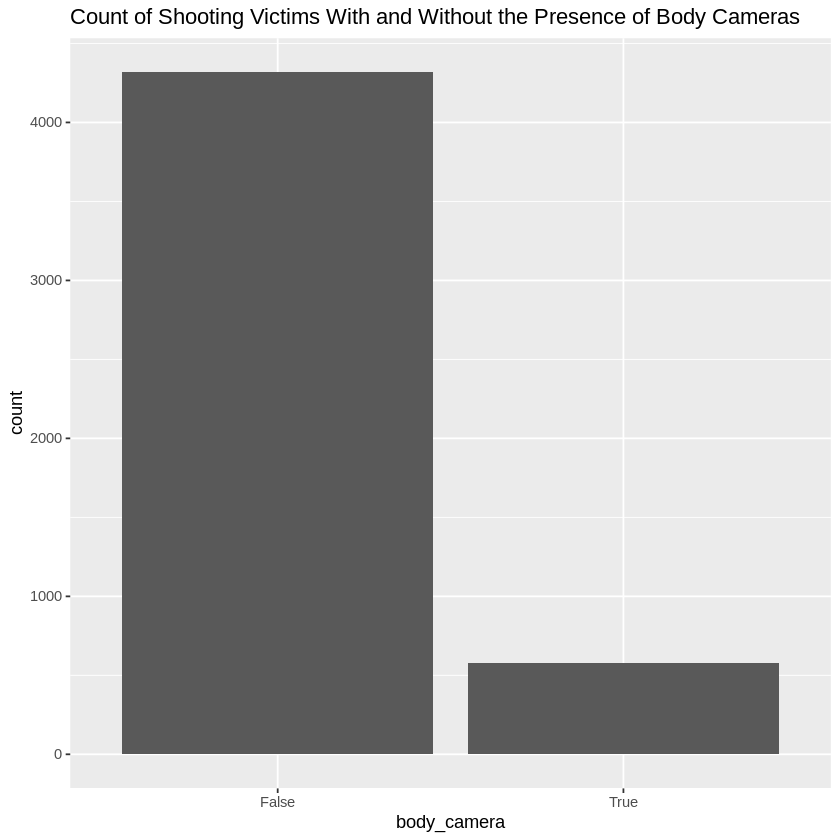

In [6]:
plot <- shootings |> 
    ggplot(aes(x = body_camera)) +
    geom_bar(stat = "count") +
    ggtitle("Count of Shooting Victims With and Without the Presence of Body Cameras")

plot

**Figure 2.2**, visualizes the count of shooting victims in the presence and absence of police body cameras.

Selecting a random sample of 400 and computing the proportion of black victims in US police shootings in the presence and absence of police body cameras shown in Figure 2.2.

In [7]:
# create a sample sized of 400: with and without activated body_camera
set.seed(121)
shootings_400 <- shootings |> rep_sample_n(size = 400)
levels(shootings_400$body_camera)

bodycam <- shootings_400 |> 
    filter(body_camera == "True") 

no_bodycam <- shootings_400 |> 
    filter(body_camera == "False")


# p1_hat: estimated proportion of black victims in US police shootings with activated body cameras
p1_hat <- bodycam %>%
    group_by(race) %>%
    summarise(count = n()) %>%
    mutate(prop = count/sum(count), 
           se = sqrt(prop*(1-prop)/100),
           body_cam = "true") %>%
    filter(race == "Black")
p1_hat

[1] "False" "True"

race,count,prop,se,body_cam
<fct>,<int>,<dbl>,<dbl>,<chr>
Black,11,0.3142857,0.04642308,true


**Figure 2.3**, a table with the count, proportion and sample error of Black victims **with** body camera from the sample. 

In [8]:
set.seed(121)
# p2_hat: etimated proportion of black victims in US police shootings with inactivated body cameras
p2_hat <- no_bodycam %>%
    group_by(race) %>%
    summarise(count = n()) %>%
    mutate(prop = count/sum(count), 
           se = sqrt(prop*(1-prop)/100),
           body_cam = "false") %>%
    filter(race == "Black")
p2_hat

race,count,prop,se,body_cam
<fct>,<int>,<dbl>,<dbl>,<chr>
Black,100,0.2739726,0.04459951,false


**Figure 2.4**, a table with the count, proportion and sample error of Black victims **without** body camera from the sample. 

In Figure 2.3 and Figure 2.4, we see there is some difference between the proportion of black victims with and without body cameras from the sample we have drawn. We also see in Figure 2.3 (with body camera), that there are far fewer data points than Figure 2.4 (without body camera). Therefore, we need further investigation to conclude if there is a statistically significant difference. 

### 3. Bootstrapping Methods

The objective is to produce an interval estimate for the difference between the proportion of black victims with and without police body cameras, and we have chosen bootstrapping method since it is best suited for studies in which data have been generated by random sampling from a population.

We now create a 95% confidence interval for the unknown population parameter $p_1 - p_2$, using the retrieved sample data (size of 400) with bootstrapping. Bootstrapping works by taking a sample from the population without replacement, and then taking many samples from this original sample with replacement. Calculating the point estimate ($p_1 - p_2$) for each bootstrapped sample allows us to approximate the sampling distribution of differences in proportions. This will show us the effect of sampling variation on our point estimates. We then construct a confidence interval of plausible values our estimate of the population parameter could fall within based off the level of confidence we want for our estimate. If our confidence interval includes 0, we are 95% confident of finding no difference between the two proportions even if we redid our analysis.

In [9]:
# we are now bootstrapping from our sample shootings_400
boot_distn_two_props <- shootings_400 %>%
  specify(race ~ body_camera, success = "Black") %>%
  generate(reps = 1000) %>%
  calculate(stat = "diff in props", order = c("True", "False"))

ci <- boot_distn_two_props %>%
  get_ci(level = 0.95)
ci

Setting `type = "bootstrap"` in `generate()`.



lower_ci,upper_ci
<dbl>,<dbl>
-0.1373332,0.1982762


**Figure 3.0**, the upper bound and lower bound of the 95% confidence interval. 

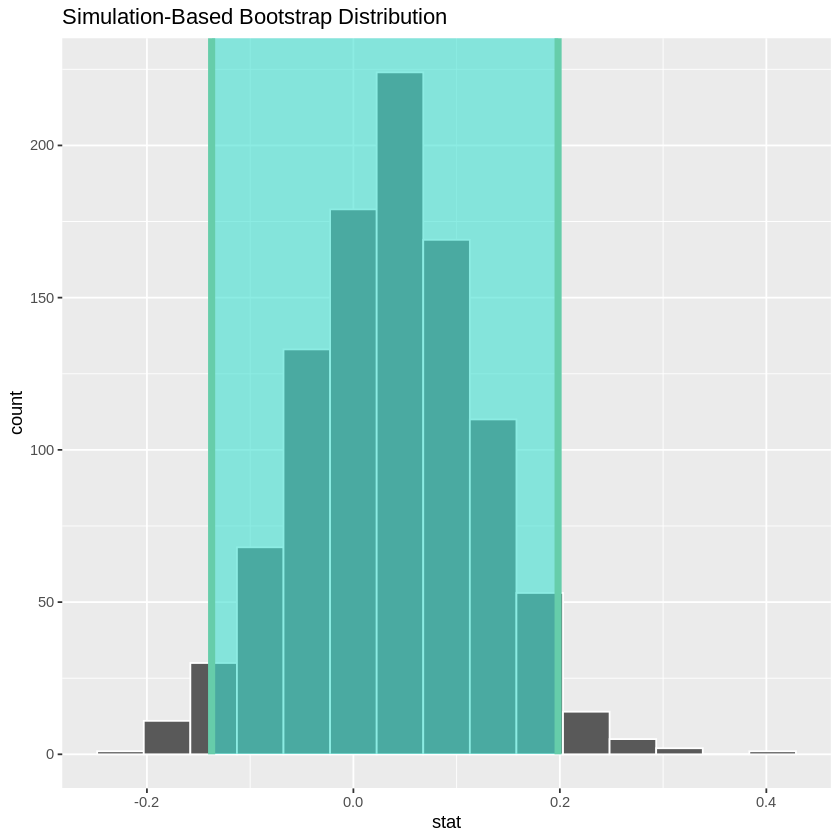

In [10]:
boot_distn_two_props %>%
  visualize() +
  shade_ci(endpoints = ci)

**Figure 3.1**, a bootstrap distribution with a 95% confidence interval shaded. 

We see in Figure 3.1 that 0 is contained in this confidence interval as a plausible value of $p_1 - p_2$. This matches with our hypothesis test results of failing to reject the null hypothesis. Since zero is a plausible value of the difference between two proportions, we are 95% confident that the proportion of black victims killed in US police shootings with the presence of body cameras is not statistically different from that with the absence of body cameras.

### 4. Asymptotics Methods

#### 4.1 Checking for assumptions

We determined that the two sample Z test of proportions is the most appropriate method to use when using a traditional theoretical approach. It is a test to see if the two populations differ significantly in certain features. We must first determine whether the assumptions for utilizing a z-test are met.

- **Independent observations**: Each case selected must be independent of all other cases.  
This condition is satisfied since each shooting incident in our sample is independent of one other. 
 
- **Independent selection of samples**: The cases are not paired in any meaningful way.
This condition is met as we have no reason to suspect that a case is selected into the sample because of any other case selected.

- **Sample size:** The number of pooled successes and pooled failures must be at least 10 for each group and the sample size is assumed to be less than 10% of the population size.

To verify if we meet this condition, we will compute the pooled successes and pooled failures for the sample with police body cameras and the sample without police body cameras.

In [11]:
bodycam_pooled <- bodycam %>%
    group_by(race) %>%
    summarise(count = n()) %>%
    mutate("sample size (n)" = sum(count), 
           "prop (p)" = count/sum(count),
           "pooled successess (n*p)" = sum(count)*count/sum(count),
           "pooled failures (n*(1-p))" = sum(count)*(1 - count/sum(count)),
           body_cam = "true") %>%
    filter(race == "Black")

nobodycam_pooled <- no_bodycam %>%
    group_by(race) %>%
    summarise(count = n()) %>%
    mutate("sample size (n)" = sum(count), 
           "prop (p)" = count/sum(count),
           "pooled successess (n*p)" = sum(count)*count/sum(count),
           "pooled failures (n*(1-p))" = sum(count)*(1 - count/sum(count)),
           body_cam = "false") %>%
    filter(race == "Black")

sample_pooled <- rbind(bodycam_pooled, nobodycam_pooled) %>%
                select(-count)

sample_pooled

race,sample size (n),prop (p),pooled successess (n*p),pooled failures (n*(1-p)),body_cam
<fct>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Black,35,0.3142857,11,24,true
Black,365,0.2739726,100,265,false


**Figure 4.0**, a table with the pooled successes and pooled failures of our samples.   
We see in Figure 4.0, the pooled successes (n\*p) and pooled failures (n\*(1-p)) for both samples are larger than 10. Thus, the condition is met. 

**All assumptions for performing a two sample z-test have now been met**, allowing us to move on to the next step. 

#### 4.2 Conducting Two Sample Z-test for Proportions

The test statistic is a random variable based on the sample data. Here, we are interested in seeing if our observed difference in sample proportions corresponding to the presence of body camera is statistically different than 0. Assuming that conditions are met and the null hypothesis is true, we can use the Z test for the hypothesis testing:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

**Figure 4.1**, the mathematical formula for the two-sample z-test test statistic. 

In [12]:
#calculating the test stat (z_hat)
pooled_phat <- (100*p1_hat$prop + 100*p2_hat$prop)/(p1_hat$count + p2_hat$count)
                         
z_hat <- (p1_hat$prop - p2_hat$prop)/sqrt(pooled_phat*(1 - pooled_phat)*(1/p1_hat$count + 1/p2_hat$count))
z_hat 

[1] 0.2542684

**Figure 4.2**, the test statistic calculated from our sample based of the formula in Figure 4.0.

In [13]:
#calculating p value
p_value <- 2 * pnorm(abs(z_hat), lower.tail = FALSE)
p_value

[1] 0.7992882

**Figure 4.3**, the p-value calculated using the test statistic from Figure 4.1.

#### 4.3 Conclusion for Two Sample Z-test

In Figure 4.3 we have calculated a p-value of 0.799 at a 5% significance level.  For a significance level of 0.05, the test outcome is not statistically significant as P-value is larger than 0.05. Therefore we fail to reject the null hypothesis and conclude that there is no statistically significant difference between the proportion of black victims shot by US police officers in the presence and absence of body cameras.

### 5. Discussion

To conduct a two-sample Z-test, which uses theory-based equations to find the sampling distribution for the test statistic, CLT assumptions must be met. On the other hand, bootstrapping uses sampling with replacement from an original sample to approximate the sampling distribution without requiring additional assumptions. Since we use the two techniques with the same sample to estimate the sampling distribution, the results were coherent, where the proportion of black shooting victims does not differ between the presence and absence of body cameras. The CLT assumptions are met because pooled successes and failures >= 10, and the sample size is less than 10% of the population size. Since all assumptions are met and our sample was collected randomly and thus should be representative of the population, our conclusions made from bootstrapping and z-tests should be equally trustworthy.

Both bootstrapping and asymptotic methods found no statistically significant difference in the proportion of black shooting victims between the presence and absence of police body cameras. Thus, we fail to reject the null hypothesis and conclude that the presence of a police body camera does not influence the proportion of black shooting victims. This was different from our expectations since we expected that police surveillance would change the proportion of black shooting victims as it would force them to become more cognizant of their racial biases. However, this conclusion may still not reflect reality due to limitations. Firstly, the ability of police departments to have access to body cameras and the financial means to buy them can differ, which would mean that the number of police officers with cameras should be much smaller than those without. This difference would skew our results.
 
The results of this investigation could lead to future questions into other factors that impact the proportion of black individuals shot, such as the victim's age or gender. Further analysis could also be done to determine if there is a correlation between the race of the police officer and the victim's race, to see if the police officers' background affects their racial bias. Evidence of police racial bias could offer an opportunity to examine any systemic flaws in the justice system, specifically in the education and accountability of the officers. Once identified, those flaws encouraging discriminatory practices in policing can be mitigated through changes in regulatory standards, guidelines, and policies.


### References

Dataset:
Nazir, A. (2020, July 30). US police shootings. Kaggle. Retrieved November 4, 2022, from https://www.kaggle.com/datasets/ahsen1330/us-police-shootings <br>
WP Company. (2020, January 22). Fatal force: Police shootings database. The Washington Post. Retrieved November 4, 2022, from https://www.washingtonpost.com/graphics/investigations/police-shootings-database/ <br>
Risk of being killed by police use of force in the United States ... - PNAS. (n.d.). Retrieved November 5, 2022, from https://www.pnas.org/doi/10.1073/pnas.1821204116 